# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [172]:
# Load the libraries as required.
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [173]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [175]:
from sklearn.model_selection import train_test_split
import numpy as np

# Creating the features dataframe X (all columns excluding the 'area' column)
X = fires_dt.drop('area', axis=1)
#print(X.columns)

# Creating the target dataframe Y that just holds 'area' column
Y = fires_dt['area']
#print(Y.shape)

# Apply logarithmic transformation to the area to reduce skewness
Y = np.log1p(Y)  # log1p is used for log(1 + Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#print(X_train.columns)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (361, 12)
X_test shape: (156, 12)
Y_train shape: (361,)
Y_test shape: (156,)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
numerical_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Define the transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Using StandardScaler
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# Create preproc1: scaling for numerical variables, one-hot encoding for categorical variables
preproc1 = ColumnTransformer(
    transformers=[
        ('num_transforms', numerical_transformer, numerical_features),
        ('cat_transforms', categorical_transformer, categorical_features)
    ]
)

preproc1

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [177]:
from sklearn.preprocessing import PolynomialFeatures

# Create preproc2: scaling with  non-linear transformation on selected numerical variables
preproc2 = ColumnTransformer(
    transformers=[
        ('num_transforms', PolynomialFeatures(degree=2, include_bias=False), numerical_features),
        ('cat_transforms', categorical_transformer, categorical_features)
    ]
)

preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 PolynomialFeatures(include_bias=False),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Pipeline A = preproc1 + baseline
baseline_model = LinearRegression()
advanced_model = RandomForestRegressor(random_state=42)

pipeline_a = Pipeline([('preprocessing', preproc1), ('regressor', baseline_model)])

pipeline_a

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [179]:
# Pipeline B = preproc2 + baseline
pipeline_b = Pipeline([('preprocessing', preproc2), ('regressor', baseline_model)])

pipeline_b

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [180]:
# Pipeline C = preproc1 + advanced model
pipeline_c = Pipeline([('preprocessing', preproc1), ('regressor', advanced_model)])

pipeline_c

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [181]:
# Pipeline D = preproc2 + advanced model

pipeline_d = Pipeline([('preprocessing', preproc2), ('regressor', advanced_model)])

pipeline_d

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [182]:

from sklearn.model_selection import GridSearchCV

# Parameter grid for LinearRegression (baseline model)
param_grid_baseline = {
    'regressor__fit_intercept': [True, False]
}

# Parameter grid for RandomForestRegressor (advanced model)
param_grid_advanced = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

In [183]:
# Pipeline A: preproc1 + LinearRegression
# Grid search for Pipeline A
grid_search_a = GridSearchCV(pipeline_a, param_grid_baseline, cv=5, scoring='neg_mean_squared_error')
grid_search_a.fit(X_train, Y_train)

# Print the best parameters and score for each model
print("Best parameters for Pipeline A (Baseline):", grid_search_a.best_params_)
print("Best score for Pipeline A (Baseline):", grid_search_a.best_score_)


Best parameters for Pipeline A (Baseline): {'regressor__fit_intercept': True}
Best score for Pipeline A (Baseline): -2.6541455015274193


In [184]:
# For Pipeline B
grid_search_b = GridSearchCV(pipeline_b, param_grid_baseline, cv=5, scoring='neg_mean_squared_error')
grid_search_b.fit(X_train, Y_train)
print("Best parameters for Pipeline B (Baseline):", grid_search_b.best_params_)
print("Best score for Pipeline B (Baseline):", grid_search_b.best_score_)

Best parameters for Pipeline B (Baseline): {'regressor__fit_intercept': False}
Best score for Pipeline B (Baseline): -5.099725250636443


In [185]:
# For Pipeline C (RandomForestRegressor)
grid_search_c = GridSearchCV(pipeline_c, param_grid_advanced, cv=5, scoring='neg_mean_squared_error')
grid_search_c.fit(X_train, Y_train)
print("Best parameters for Pipeline C (Advanced):", grid_search_c.best_params_)
print("Best score for Pipeline C (Advanced):", grid_search_c.best_score_)

Best parameters for Pipeline C (Advanced): {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best score for Pipeline C (Advanced): -2.183055916168273


In [186]:
# For Pipeline D (RandomForestRegressor)
grid_search_d = GridSearchCV(pipeline_d, param_grid_advanced, cv=5, scoring='neg_mean_squared_error')
grid_search_d.fit(X_train, Y_train)
print("Best parameters for Pipeline D (Advanced):", grid_search_d.best_params_)
print("Best score for Pipeline D (Advanced):", grid_search_d.best_score_)

Best parameters for Pipeline D (Advanced): {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}
Best score for Pipeline D (Advanced): -2.148877064829518


# Evaluate

+ Which model has the best performance?

## The scores reported are negative mean squared errors (MSE), which means that a less negative score indicates better model performance. Accordingly, the model with the best performance is Pipeline C (Advanced), as it has the least negative score of -2.1831. So in conclusion, base on the above results, it is clear that using an advanced regression model ( in our case: Random Forest) yields better predictions for the burned area of the forest compared to the baseline model (Linear Regression).

# Export

+ Save the best performing model to a pickle file.

In [187]:
import joblib
import pickle
# Pipeline C (Advanced) is the best performing model
best_model = grid_search_c.best_estimator_

# Save the model to a file
joblib.dump(best_model, '../../05_src/data/best_forest_fire_model.pkl')

print("Best model saved to '../../05_src/data/best_forest_fire_model.pkl'")

Best model saved to '../../05_src/data/best_forest_fire_model.pkl'


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [188]:
import shap

# Loading the best pipeline from the pickle file
best_pipeline = joblib.load('../../05_src/data/best_forest_fire_model.pkl')

# Transform the test data using the pipeline's preprocessing steps
X_test_transformed = best_pipeline.named_steps['preprocessing'].transform(X_test)

# Create a SHAP TreeExplainer for the best regressor
explainer = shap.TreeExplainer(best_pipeline.named_steps['regressor'])

# Compute SHAP values for the transformed test set
shap_values = explainer.shap_values(X_test_transformed)

# Visualize SHAP values for a specific observation, e.g., the first observation
shap.initjs()

# Use the right index for the transformed data
shap.force_plot(explainer.expected_value, shap_values[0], X_test_transformed[0], feature_names=best_pipeline.named_steps['preprocessing'].get_feature_names_out())

In [189]:
# Let's say we want to explain the first observation in the test set
observation_index = 0

# SHAP values for the specific observation
shap_values_for_obs = shap_values[observation_index]

# Plot the force plot for this specific observation
shap.force_plot(explainer.expected_value, shap_values_for_obs, X_test_transformed[observation_index], 
                 feature_names=best_pipeline.named_steps['preprocessing'].get_feature_names_out())

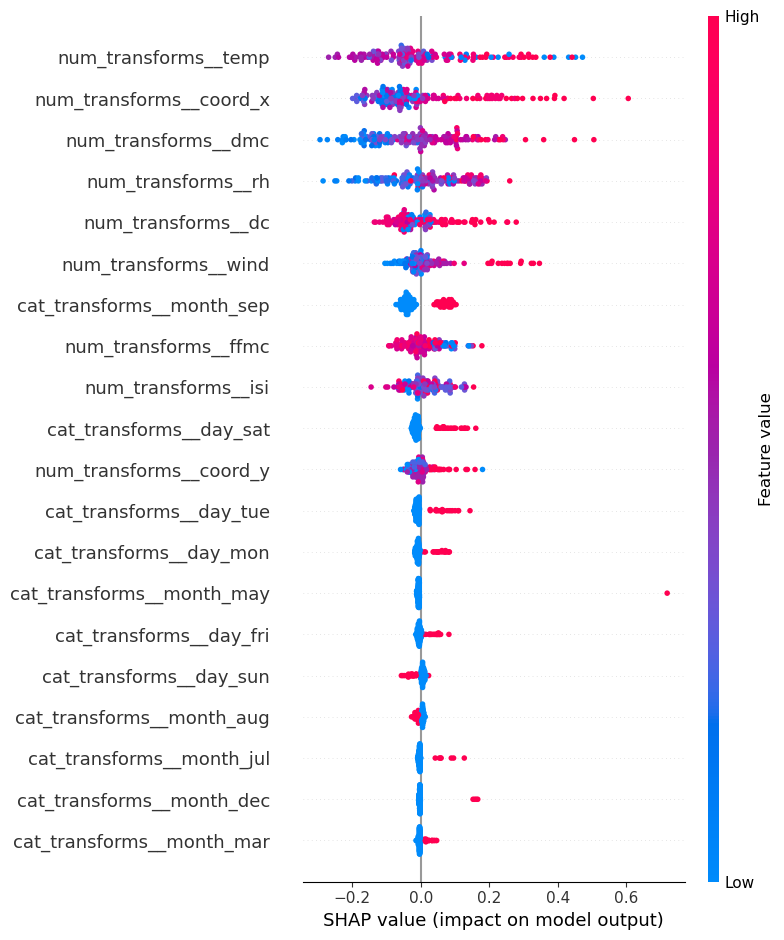

In [190]:
# Create a summary plot for all test observations
shap.summary_plot(shap_values, X_test_transformed, feature_names=best_pipeline.named_steps['preprocessing'].get_feature_names_out())

Above summary plot shows all the SHAP values for each feature across all observations.
a) Features that have a longer spread in the plot (more dots) are generally more important.

*(Answer here.)*

If we were to remove features from the model, we might consider removing those that are the least important based on your analysis from the SHAP summary plot above. For example, the month or day consistently show minimal impact on predictions, so we can consider removing these features.

Steps for feature removal:
1) We have to create a new dataset by excluding these features ( month and day )
2) We have to re-train the Model using the reduced feature set.
3) Use the same model pipeline but have to adjust the input data to exclude these features.
4) Evaluate Model Performance by comparing the performance metrics (e.g., mean squared error, R-squared) of the original model and the new model with removed features using cross-validation.
5) If the new model performs similarly or better, it suggests that the removed features were not enhancing performance.


In [171]:
from sklearn.metrics import mean_squared_error
# Adjusting to remove 'month' and 'day'
num_features_reduced = [col for col in numerical_features if col not in ['month', 'day']]
cat_features_reduced = [col for col in categorical_features if col not in ['month', 'day']]

# Define the preprocessor with updated feature lists
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num_transforms', StandardScaler(), num_features_reduced),
        ('cat_transforms', OneHotEncoder(handle_unknown='ignore'), cat_features_reduced)
    ]
)

# Fit the original pipeline, but use X_train_reduced
pipeline_reduced = Pipeline(steps=[
    ('preprocessing', preprocessor_reduced),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Drop 'month' and 'day'
X_reduced = X.drop(columns=['month', 'day'])

# Split into train and test sets again, then re-fit the pipeline with reduced features
X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.3, random_state=42)

pipeline_reduced.fit(X_train_reduced, Y_train)

# Evaluate performance on test set
y_pred_reduced = pipeline_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(Y_test, y_pred_reduced)

# Compare with the original model's performance
print("MSE for the reduced model:", mse_reduced)

MSE for the reduced model: 2.038063262162931


The original model’s MSE is -2.1831, which suggests better performance as this metric is lower (closer to 0 means better fit). The reduced model has an MSE of 2.0381, indicating a drop in performance after removing features. Removing features typically simplifies the model, potentially reducing the overfitting, training time, and the computational cost. If these factors are critical, the reduced model might be preferable if its performance is deemed “good enough” for the application. However, if the prediction accuracy is paramount, the original model should be favored due to its lower error rate.

## Criteria

The [rubric](./assignment_3_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.